In [4]:
from multiclass_functions_1 import *
import torch
from torchvision import datasets, transforms

In [5]:
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root = '/Users/sanghyun/Desktop/GIT_Folder', train=True, download=False, transform=transform)
test_DS = datasets.MNIST(root  = '/Users/sanghyun/Desktop/GIT_Folder', train=False, download=False, transform=transform)

In [6]:
BATCH_SIZE = 32
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [7]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Sequential(nn.Linear(28 * 28, 100),
                                    nn.ReLU(),
                                    nn.Linear(100, 10))
    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.linear(x)
        return x

In [8]:
model = MLP().to(DEVICE)
LP = 1e-3
EPOCH = 20
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = LP)
loss_history = Train(model, train_DL, criterion, optimizer, EPOCH)
Test(model, test_DL)

Epoch: 1, train loss: 0.311
--------------------
Epoch: 2, train loss: 0.143
--------------------
Epoch: 3, train loss: 0.099
--------------------
Epoch: 4, train loss: 0.074
--------------------
Epoch: 5, train loss: 0.058
--------------------
Epoch: 6, train loss: 0.047
--------------------
Epoch: 7, train loss: 0.038
--------------------
Epoch: 8, train loss: 0.029
--------------------
Epoch: 9, train loss: 0.025
--------------------
Epoch: 10, train loss: 0.022
--------------------
Epoch: 11, train loss: 0.017
--------------------
Epoch: 12, train loss: 0.015
--------------------
Epoch: 13, train loss: 0.013
--------------------
Epoch: 14, train loss: 0.011
--------------------
Epoch: 15, train loss: 0.01
--------------------
Epoch: 16, train loss: 0.009
--------------------
Epoch: 17, train loss: 0.007
--------------------
Epoch: 18, train loss: 0.008
--------------------
Epoch: 19, train loss: 0.007
--------------------
Epoch: 20, train loss: 0.006
--------------------
Test accur

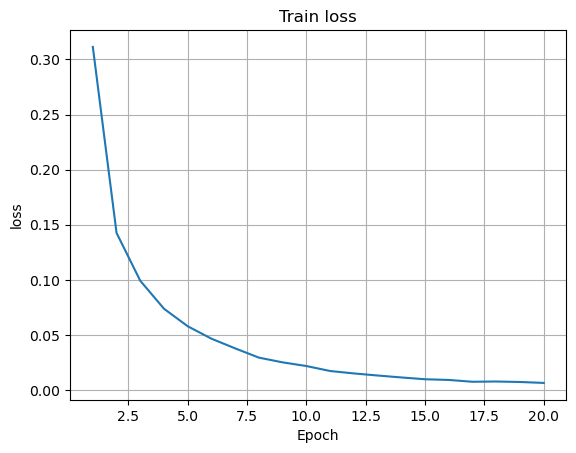

In [55]:
plt.plot(range(1, EPOCH + 1), loss_history)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Train loss')
plt.grid()

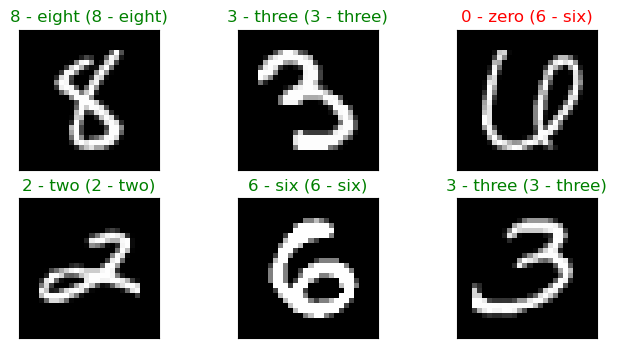

In [54]:
Test_plot(model, test_DL)